In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

### Ignition Curve
When does Helium ignite and is it thermaly stable? The generation rate from triple alpha process is given by <br>
<br>
$$
\epsilon_{3\alpha} = 5.3\times 10^{21}\frac{\rho_5^2 Y^3}{T^3_8} exp\Big(\frac{-44}{T_8}\Big) \;ergs\,g^{-1}\;s^{-1}
$$
Which we will compare to the cooling rate:

$$
\epsilon_{cool} \equiv -\frac{acT^4}{3\kappa y^2}
$$

The boundary of stable/unstable helium burning will be given by:

$$
\frac{d\epsilon{3\alpha}}{dT} = -\frac{d\epsilon_{cool}}{dT}
$$

We can derive asuming a constant pressure, so the expressios to compare will be:

$$
\frac{d\epsilon_{cool}}{dT} = -4\frac{acT^3}{3\kappa y^2}
$$


$$
\frac{d\epsilon_{3\alpha}}{dT} = 5.3\times 10^{21}\cdot \rho_5^2 Y^3\Bigg[ \frac{-3}{T^4_8} exp\Big(\frac{-44}{T}\Big) + \frac{1}{T^3_8} exp\Big(\frac{-44}{T_8}\Big)\cdot \frac{44}{T_8^2}\Bigg]
$$

$$
\frac{d\epsilon_{3\alpha}}{dT} = (5.3\times 10^{21})\; \rho_5^2 Y^3\;\Bigg[\frac{44}{T_8^5} - \frac{3}{T_8^4}\Bigg] \;exp\Big(\frac{-44}{T_8}\Big)
$$

Lets compare them :-)

In [2]:
#define the necesary constants to use in both functions

p = {'c': 3e10, #cm s^-1 
     'a': 7.56e-15, #erg, cm^-3 K^-4 (rad constant)
     'k': 0.136, #cm^2 g^-1 (opacity)
     'y': 3.3e7, #g cm^-2 (column depth)
     'Y': 0.3, #unitless (?) no idea
     'rho': 2e5, #g cm^-3 (density)
    }

def triple_alpha_rate(T, p):
    
    T8 = T * 10 ** -8
    rho5 = p['rho'] * 10 ** -5
    
    c1 = 5.3e21 * rho5 * p['Y'] ** 3
    
    return c1 / T8 ** 3 * np.exp(- 44 / T8) #ergs g^-1 s^-1

def cool_rate(T, p):
    
    #return a * c * T ** 4 / (3 * k * y**2)
    return p['a'] * p['c'] * T**4  / (3 * p['k'] * p['y'] ** 2)

def d_epsilon_cool(T, p):
    # (-1) *  epsilon cool rate
    
    return  4 * p['a'] * p['c'] * T**3  / (3 * p['k'] * p['y'] ** 2)

def d_epsilon_alpha(T, p):
    
    T8 = T * 10 ** -8
    rho5 = p['rho'] * 10 ** -5
    
    c1 = 5.3e21 * rho5 * p['Y'] ** 3
    
    
    return c1 * (44 / (T8 ** 5) - 3 / (T8 ** 3)) * np.exp(-44 / T8)
    

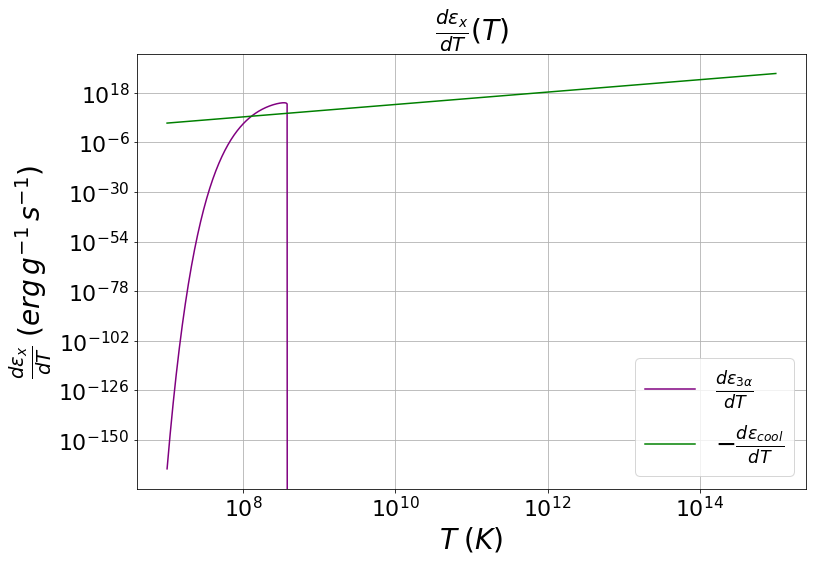

In [3]:
T = np.logspace(7, 15, 1000)
triple_a = triple_alpha_rate(T, p)
cool = cool_rate(T, p)
d_triple_a = d_epsilon_alpha(T, p)
d_cool =  d_epsilon_cool(T, p)


# fig = plt.figure(figsize=(10,8))
# plt.plot(T, triple_a, c='purple', label=r'$\epsilon_{3\alpha}$')
# plt.plot(T, cool, c='green', label=r'$\epsilon_{cool}$')
# plt.xlabel(r'$T \;(K)$', fontsize=18)
# plt.ylabel(r'$\epsilon_x\;(erg\,g^{-1}\,s^{-1})$', fontsize=18)
# plt.title(r'$\epsilon_{3\alpha}\,(T)$ and $\epsilon_{cool}(T)$', fontsize=20)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# plt.xscale('log')
# plt.yscale('log')
# plt.legend(fontsize=18)
# plt.show()

#fig, ax = plt.subplots(1, 2, figsize=(15,8))
fig, ax = plt.subplots(figsize=(12,8))
# fig.tight_layout()
fig.subplots_adjust(wspace=.3)

# ax[0].plot(T, triple_a, c='purple', label=r'$\epsilon_{3\alpha}$')
# ax[0].plot(T, cool, c='green', label=r'$\epsilon_{cool}$')
# ax[0].set_xlabel(r'$T \;(K)$', fontsize=18)
# ax[0].set_ylabel(r'$\epsilon_x\;(erg\,g^{-1}\,s^{-1})$', fontsize=18)
# ax[0].set_title(r'$\epsilon_x(T)$', fontsize=20)
# #ax[0].set_xticks(fontsize=16)
# ax[0].tick_params(axis='both', which='major', labelsize=14)
# #ax[0].yticks(fontsize=16)
# ax[0].set_xscale('log')
# ax[0].set_yscale('log')
# ax[0].legend(fontsize=18)

# ax[1].plot(T, d_triple_a, c='purple', label=r'$\frac{d\epsilon_{3\alpha}}{dT}$')
# ax[1].plot(T, d_cool, c='green', label=r'$-\frac{d\epsilon_{cool}}{dT}$')
# ax[1].set_xlabel(r'$T \;(K)$', fontsize=18)
# ax[1].set_ylabel(r'$\frac{d\epsilon_x}{dT}\;(erg\,g^{-1}\,s^{-1})$', fontsize=18)
# ax[1].set_title(r'$\frac{d\epsilon_x}{dT}(T)$', fontsize=20)
# #ax[0].set_xticks(fontsize=16)
# ax[1].tick_params(axis='both', which='major', labelsize=14)
# #ax[0].yticks(fontsize=16)
# ax[1].set_xscale('log')
# ax[1].set_yscale('log')
# ax[1].legend(fontsize=18)

ax.plot(T, d_triple_a, c='purple', label=r'$\frac{d\epsilon_{3\alpha}}{dT}$')
ax.plot(T, d_cool, c='green', label=r'$-\frac{d\epsilon_{cool}}{dT}$')
ax.set_xlabel(r'$T \;(K)$', fontsize=28)
ax.set_ylabel(r'$\frac{d\epsilon_x}{dT}\;(erg\,g^{-1}\,s^{-1})$', fontsize=28)
ax.set_title(r'$\frac{d\epsilon_x}{dT}(T)$', fontsize=28)
#ax[0].set_xticks(fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=22)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(fontsize=25)
ax.grid()

plt.show()

In [4]:
d_epsilon_alpha(1e7, p)

1.0238917828289622e-164

### Pressure plots

For the atmosphere:
$$
p = \rho R T
$$
$$ 
H_p = \frac{p}{g\rho}
$$

For the ocean, pressure is given by electron degenracy pressure:
$$
p_e = \frac{(3\pi^2)^{2/3}\hbar^2}{5 m_e} \rho^{5/3}_e
$$

$$
H_p \approx \Big[ e^{(\gamma-1)/\gamma} - 1\Big]\frac{\gamma}{\gamma-1} \frac{p}{g \rho }
$$

In [5]:
param = {'g': 10,
     'me': 0,
     'hbar': 0}

In [6]:
def e_pres(rho, p=param):
    
    return (3 * np.pi ** 2)  ** (2/3) * p['hbar']  ** 2 / (5 * p['me']) * rho ** (5/3)
    
def h_p(rho, gamma, p=param):
    
    
    pressure = e_pres(rho, p)
    gamma_factor =  (np.e ** ((gamma - 1) / gamma) - 1) * gamma / (gamma - 1) 
    
    return gamma_factor * pressure /(p['g'] * rho)
    
    

We will recreate Figure 1 of [Mukherjee 2017](https://ui.adsabs.harvard.edu/abs/2017JApA...38...48M/abstract)

In [7]:
#all in cgs
param = {'c': 3e10, #cm s^-1
         'me': 9.109e-28, #g
         'mp': 1.672e-24, #g
         'h': 1e-27 * 2*np.pi, #erg s
         'mu_e': 2, #Da, mean molecular weight
         'G': 6.67e-8 #cgs
        }

In [8]:
def x_F(rho, p=param):
    
    c1 = 1 / (p['me'] * p['c'])
    c2 = (3 * p['h']**3 / (8 * np.pi * p['mu_e'] * p['mp'])) ** (1/3)
    return c1 * c2 * rho ** (1/3)

def Fermi(rho, p=param):
    
    xF = x_F(rho, p)
    
    c1 = np.pi / 3 * p['me'] ** 4 * p['c'] ** 5 / p['h'] ** 3
    
    term_1 = xF * np.sqrt(xF ** 2 + 1) * (2 * xF ** 2 - 3)
    term_2 = 3 * np.log(xF + np.sqrt(1 + xF ** 2))
    
    return c1 * (term_1 + term_2)
    
def Paczynski(rho, p=param):
    
    xF = x_F(rho, p)
    
    c1 = np.pi / 3 * p['me'] ** 4 * p['c'] ** 5 / p['h'] ** 3
    term_1 = 8/5 * xF ** 5
    term_2 = (1 + 16/25 * xF ** 2) ** (1/2)
    
    return c1 * term_1 / term_2

def UR(rho, p=param):
    #ultra relativistic polytrope. gamma = 4/3
    
    return 4.89e14 * rho ** (4/3)

def NR(rho, p=param):
    #non-relativistic polytrope. gamma = 5/3
    
    return 3.12e12 * rho ** (5/3)

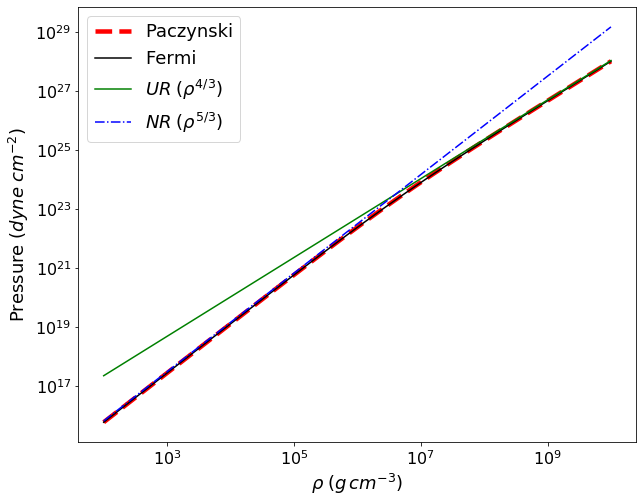

In [9]:
rho = np.logspace(2, 10, 100)

xF = x_F(rho)
fermi_pressure = Fermi(rho)
pacz_pressure = Paczynski(rho)
ur_pressure = UR(rho)
nr_pressure = NR(rho)

fig = plt.figure(figsize=(10, 8))
plt.plot(rho, pacz_pressure, label='Paczynski', c='red', linestyle='--',
         linewidth=4.5)
plt.plot(rho, fermi_pressure, label='Fermi', c='black', linestyle='-')
plt.plot(rho, ur_pressure, label=r'$UR\;(\rho^{4/3})$', c='green', linestyle='-')
plt.plot(rho, nr_pressure, label=r'$NR\;(\rho^{5/3})$', c='blue', linestyle='-.')
plt.xlabel(r'$\rho\;(g\,cm^{-3})$', fontsize=18)
plt.ylabel(r'Pressure $(dyne\;cm^{-2})$', fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.show()


In [10]:
#get UR = NR intersection

dif = ur_pressure - nr_pressure
a = rho[dif < 0]
print('rho char: ', a[0])


rho char:  4037017.258596558


In [11]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 1])
print(np.setdiff1d(a, b))

[2 3 4]


In [12]:
def combined_polytrope(rho):
    '''
    defined a charasteristic changed density where matter goes from 
    non-relativistic to ultra relativistic.
    '''
    
    #we will choose the point where UR = NR
    rho_char = 4037017.258596558
    
    #first we split the arrays
    nr_part = rho[rho < rho_char]
    ur_part = rho[rho >= rho_char]

    
    ur_pressure = 4.89e14 * ur_part ** (4/3)
    nr_pressure = 3.12e12 * nr_part ** (5/3)
    print(f"Tiping point: (rho, P) = ({ur_part[0]}, {ur_pressure[0]})")
    
    if len(np.concatenate((nr_part, ur_part))) != len(rho):
        print('Error: characteristic division does not include all values of rho' )
        print(f'ur_part: {len(ur_part)}, nr_part: {len(nr_part)}, concatete: {len(np.concatenate((nr_part, ur_part)))}, sum: {len(ur_part) + len(nr_part)}')
        print('Set difference: ', np.setdiff1d(np.concatenate((nr_part, ur_part)), rho))
            
        for r in rho:
            if not r < rho_char and not r >= rho_char:
                print('Found you!: ', r)
    
    
    return np.concatenate((nr_pressure, ur_pressure))

Tiping point: (rho, P) = (4037017.258596558, 3.143327754352033e+23)


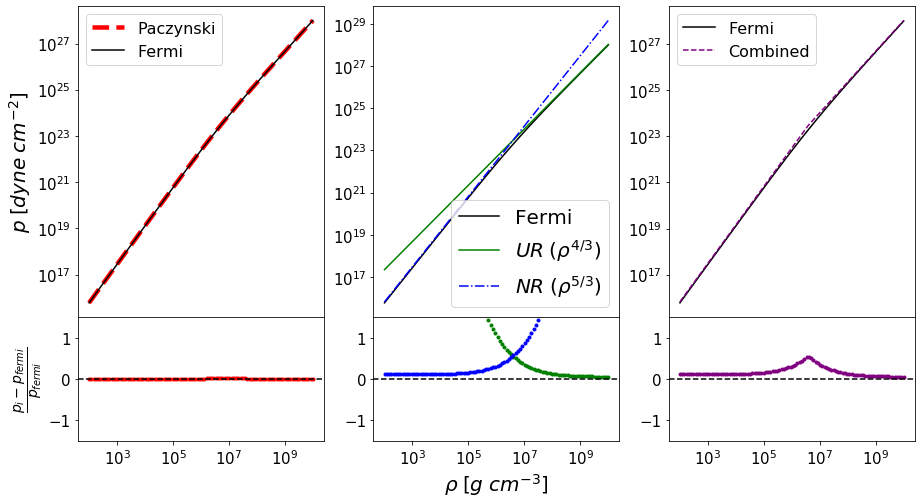

In [13]:
pacz_ratio = (pacz_pressure - fermi_pressure) / fermi_pressure
ur_ratio = (ur_pressure - fermi_pressure)/ fermi_pressure
nr_ratio = (nr_pressure - fermi_pressure)/ fermi_pressure

combined_pressure = combined_polytrope(rho)
combined_ratio = (combined_pressure - fermi_pressure)/ fermi_pressure

fig, ax = plt.subplots(2, 3, figsize=(15,8),
                      gridspec_kw={
                            'width_ratios': [1, 1, 1],
                            'height_ratios': [2.5, 1],
                            'wspace': 0.2,
                            'hspace': 0})
ax[0,0].plot(rho, pacz_pressure, label='Paczynski', c='red', linestyle='--',
         linewidth=4.5)
ax[0,0].plot(rho, fermi_pressure, label='Fermi', c='black', linestyle='-')
ax[0,0].set_yscale('log')
ax[0,0].set_xscale('log')
ax[0,0].legend(fontsize=16)
ax[0,0].set_ylabel(r'$p\;[dyne\;cm^{-2}]$', fontsize=20)
ax[0,0].tick_params(labelsize=15)

ax[0,1].plot(rho, fermi_pressure, label='Fermi', c='black', linestyle='-')
ax[0,1].plot(rho, ur_pressure, label=r'$UR\;(\rho^{4/3})$', c='green', linestyle='-')
ax[0,1].plot(rho, nr_pressure, label=r'$NR\;(\rho^{5/3})$', c='blue', linestyle='-.')
ax[0,1].set_yscale('log')
ax[0,1].set_xscale('log')
ax[0,1].legend(fontsize=20)
ax[0,1].tick_params(labelsize=15)



ax[0,2].plot(rho, fermi_pressure, label='Fermi', c='black', linestyle='-')
ax[0,2].plot(rho, combined_pressure, label='Combined', c='purple', linestyle='--')
ax[0,2].set_yscale('log')
ax[0,2].set_xscale('log')
ax[0,2].legend(fontsize=16)
ax[0,2].tick_params(labelsize=15)

#ratio
ax[1,0].plot(rho, pacz_ratio, '.', c='red')
ax[1,0].axhline(y=0, c='black', linestyle='--')
ax[1,0].set_xscale('log')
ax[1,0].set_ylim(-1.5, 1.5)
ax[1,0].set_ylabel(r'$\frac{p_i-p_{fermi}}{p_{fermi}}$', fontsize=20)
ax[1,0].tick_params(labelsize=15)

ax[1,1].plot(rho, ur_ratio, '.', c='green')
ax[1,1].plot(rho, nr_ratio, '.', c='blue')
ax[1,1].axhline(y=0, c='black', linestyle='--')
ax[1,1].set_xscale('log')
ax[1,1].set_ylim(-1.5, 1.5)
ax[1,1].set_xlabel(r'$\rho\;[g\;cm^{-3}]$', fontsize=20)
ax[1,1].tick_params(labelsize=15)

ax[1,2].plot(rho, combined_ratio, '.',c='purple')
ax[1,2].axhline(y=0, c='black', linestyle='--')
ax[1,2].set_xscale('log')
ax[1,2].set_ylim(-1.5, 1.5)
ax[1,2].tick_params(labelsize=15)


plt.show()

**Paczynski** <br>

$$
P = \frac{\pi}{3}\frac{m_e^4c^5}{h^3}\frac{(8/5)x_F^5}{(1+(16/25)x_F^2)^{1/2}}
$$

With 

$$
x_F = \frac{1}{m_ec}\Bigg(\frac{3h^3}{8\pi\mu_em_p}\Bigg)^{1/3}\rho^{1/3}
$$

<br>
<br>


We can now obtain the density profile  $\rho(z)$ of the NS by integrating:<br>


$$
\frac{\partial p}{\rho(p)} = g_z\partial z
$$

$$
\int_{P_{crust}}^P \frac{dp'}{\rho(p')} = \int_{z_{crust}=0}^z g_{z'}dz'
$$
<br>
Asuming $g_z  = \frac{G\,M_*}{r_*^2}$ to be constant. For the combined polytrope this is straightforward. <br>
For $\rho < \rho_{ch}$ we have:
$$
\rho(p) = \Bigg(\frac{p}{3.12\times10^{12}}\Bigg)^\frac{3}{5} = c\cdot p^\frac{3}{5}
$$
<br>
$$
\int_{p_{crust}}^p \frac{dp'}{c\cdot p^\frac{3}{5}} = \int_0^z g_{z'}dz'
$$

$$
c^{-1}\int_{p_{c}}^p p'^{-\frac{3}{5}}dp' = g_z\cdot z
$$

$$
c^{-1}\cdot p^{2/5}\frac{5}{2} \Bigg|_{p_c}^p = g_z\cdot z
$$

Then

$$
p(z) = \Bigg[\frac{2}{5}c\cdot g_z  \cdot z + p_c^\frac{2}{5} \Bigg]^\frac{5}{2}
$$



Then, using $\rho(p)$ we obtain:

$$
\rho(z) =  \Bigg[\frac{2}{5}c\cdot g_z  \cdot z + p_c^\frac{2}{5} \Bigg]^\frac{3}{2} \cdot c
$$




Now for $\rho > \rho_{ch}$:

$$
\rho(p) = \Bigg(\frac{p}{4.89 \times 10^{14}}\Bigg) ^\frac{3}{4} = k\cdot p^\frac{3}{4}
$$
<br>


We asume this function will takever after a certain characteristic height $z_{ch}$  where $\rho(z_{ch}) = \rho_{ch}$. Therefore our integration limits are different:

$$
\int_{p_{ch}}^p \frac{dp'}{k\cdot p'^{3/4}} = \int_{z_{ch}}^z g_z dz
$$

$$
k^{-1}p^




### Density profiles
The Paczynski density profile was integrated numerically in the Mathematica file Dif_solve.nb. The result is then exported to the data folder under Paczynski.csv. 

In [14]:
with open('data/Paczynski.csv', 'r') as file:
    lines =  file.readlines()
#even lines are z, odd lines are rho. Kinda stupid, couldn't fix it on the mathematica notebook .^.
z_pac = []
rho_pac = []
for line, i in zip(lines, range(len(lines))):
    if i % 2 == 0: #even index
        z_pac.append(float(line))
    else:
        rho_pac.append(float(line))


In [15]:
def ur_rho(z): 
    '''
    Integrating p = 4.89 x 10^14 * rho ^ (4/3) from rho[0] = 10^9
    
    '''
    
    return  -0.0008704524348117549 *  (-1.1488278509052148e12 + 
   3.2907222305990475e8 * z - 31420.0042835725 * z**2 + z**3)

def nr_rho(z):
    ''' 

    Integrating p = 3.12 x 10^12 * rho^(5/3 from rho[0] = 10^9)
    '''
    
    #return  -0.0008704524348117549* (-1.1488278509052148e12 + 
    #3.2907222305990475e8 * z - 31420.0042835725 * z ** 2 + z ** 3)

    return 117.161 * (41764.8 - z) ** (3/2)

def nr_rho_combined(z):
    '''
    Integrating p = 4.89 x 10^14 * rho ^ (4/3) from the characteristic density (broken power law)
    rho[8805.6836882763] = 4037017.258596558
    We then combine it with ur_rho(z) to get the full broken power law. 
    '''
    return 117.16122229579658* (9864.57440646902 -  z) ** (3/2)
#def nr_rho_2(z):
#    return 117.16122229579658*(41764.83186977941 - z) **(3/2)

In [16]:
nr_rho(9864.57440646902)

667534477.2579582

/Users/cristozilleruelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in power


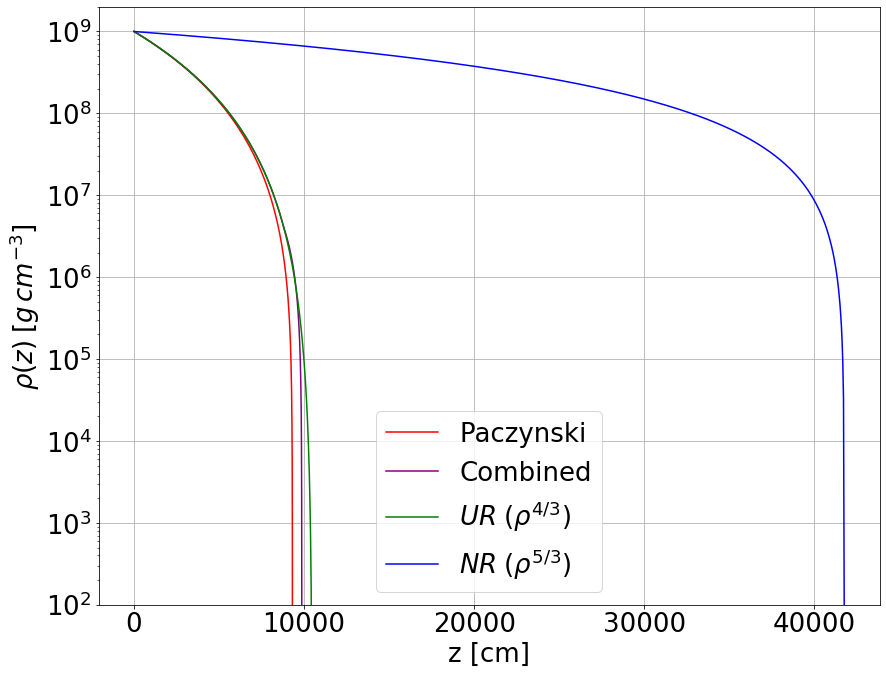

In [30]:
fig = plt.figure(figsize=(14,11))

#Paczynski
plt.plot(z_pac, rho_pac, c='red', label='Paczynski')

#combined profile
z_ch = 8805.68
z_ur_c = np.linspace(0, z_ch, 1000)
z_nr_c = np.linspace(z_ch, 10000, 1000)
rho_ur_c = ur_rho(np.array(z_ur_c))
rho_nr_c = nr_rho_combined(np.array(z_nr_c))

plt.plot(z_ur_c, rho_ur_c, c='purple', label='Combined')
plt.plot(z_nr_c, rho_nr_c, c='purple')

#ur 
z_ur = np.linspace(0, 12000, 1000)
rho_ur = ur_rho(z_ur)
plt.plot(z_ur, rho_ur, c='green', label=r'$UR\;(\rho^{4/3})$')

#nr
z_nr = np.linspace(0, 41764, 1000)
rho_nr = nr_rho(z_nr)
plt.plot(z_nr, rho_nr, c='blue', label=r'$NR\;(\rho^{5/3})$')





plt.plot()
plt.yscale('log')
#plt.xscale('log')
plt.legend(fontsize=26)
plt.grid()
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel(r'$\rho(z)\;[g\,cm^{-3}]$', fontsize=26)
plt.ylim(1e2, 2e9)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.show()

We can get profiles of density, pressure and Temperature. 

### Column depth plots
Calculated in the Mathematica Dif_solve.nb file, and exported into data/Paczynski_column.csv. For this we integrate top-down, from the maximum height obtained which is $z_{max} = 9313\;cm$.

In [31]:
with open('data/Paczynski_column.csv', 'r') as file:
    lines =  file.readlines()
#even lines are z, odd lines are rho. Kinda stupid, couldn't fix it on the mathematica notebook .^.
z_pac_y = []
y_pac = []
for line, i in zip(lines, range(len(lines))):
    if i % 2 == 0: #even index
        z_pac_y.append(float(line))
    else:
        y_pac.append(-float(line))


For the polyytrope integration we do it here in python becaouse of some errors in the mathematica noebook. 

/Users/cristozilleruelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.


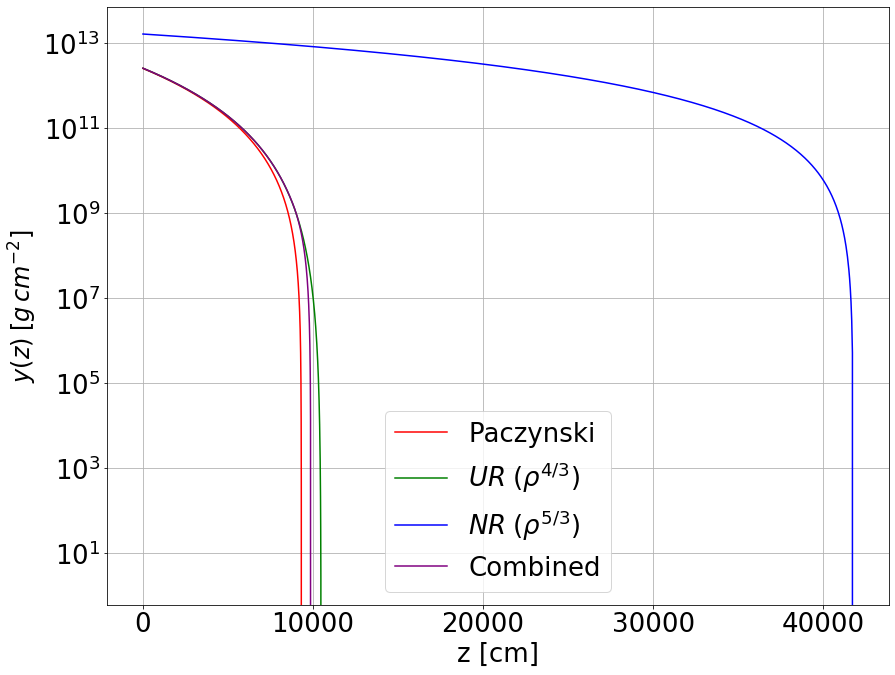

In [32]:
z_char = 8805.68
def combined_rho(z):
    if z > z_char:
        return nr_rho_combined(z)
    else:
        return ur_rho(z)


    
#integrate from max h. 

#Combined: given by the formula of nr_rho_combined
max_h = 9864.57440646902
z_combined_y = np.linspace(0, max_h, 1000)

y_combined = []
for path in z_combined_y:
    a= integrate.quad(combined_rho, max_h, path)
    y_combined.append(-a[0])


#UR: given by runing Solve[rho3[z]==0, z] in the mathematicca notebook. 
max_h = 10473.3
z_ur_y = np.linspace(0, max_h, 1000)

y_ur = []
for path in z_ur_y:
    a= integrate.quad(ur_rho, max_h, path)
    y_ur.append(-a[0])
    
#NR: max h from nr_rho formula
max_h = 41764.8
z_nr_y = np.linspace(0, max_h, 1000)


y_nr = []
for path in z_nr_y:
    a= integrate.quad(nr_rho, max_h, path)
    y_nr.append(-a[0])

    

fig = plt.figure(figsize=(14,11))

plt.plot(z_pac_y, y_pac, c='red', label='Paczynski')
plt.plot(z_ur_y, y_ur, c='green', label=r'$UR\;(\rho^{4/3})$')
plt.plot(z_nr_y, y_nr,  c='blue', label=r'$NR\;(\rho^{5/3})$')
plt.plot(z_combined_y, y_combined, c='purple', label='Combined')
plt.yscale('log')
plt.legend(fontsize=26)
plt.grid()
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel(r'$y(z)\;[g\,cm^{-2}]$', fontsize=24)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
#plt.ylim(1, 1e13)
plt.show()

In [33]:
def combined_polytrope(rho):
    '''
    We need to redefine the function beacue we are supplying rho in the oposite order
    defined a charasteristic changed density where matter goes from 
    non-relativistic to ultra relativistic.
    '''
    
    #we will choose the point where UR = NR
    rho_char = 4037017.258596558
    
    #first we split the arrays
    nr_part = rho[rho < rho_char]
    ur_part = rho[rho >= rho_char]

    
    ur_pressure = 4.89e14 * ur_part ** (4/3)
    nr_pressure = 3.12e12 * nr_part ** (5/3)
    print(f"Tiping point: (rho, P) = ({ur_part[0]}, {ur_pressure[0]})")
    
    if len(np.concatenate((nr_part, ur_part))) != len(rho):
        print('Error: characteristic division does not include all values of rho' )
        print(f'ur_part: {len(ur_part)}, nr_part: {len(nr_part)}, concatete: {len(np.concatenate((nr_part, ur_part)))}, sum: {len(ur_part) + len(nr_part)}')
        print('Set difference: ', np.setdiff1d(np.concatenate((nr_part, ur_part)), rho))
            
        for r in rho:
            if not r < rho_char and not r >= rho_char:
                print('Found you!: ', r)
    
    
    return np.concatenate((ur_pressure, nr_pressure))

/Users/cristozilleruelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in power


Tiping point: (rho, P) = (1000000000.0, 4.889999999999992e+26)


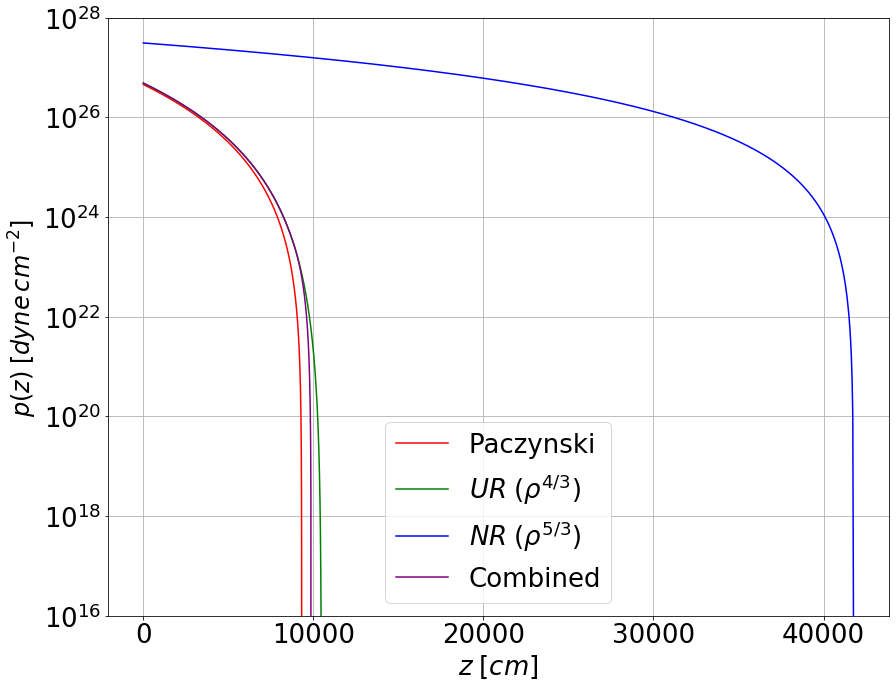

In [34]:
p_pac = Paczynski(np.array(rho_pac))
p_nr = NR(nr_rho(z_nr))
p_ur = UR(ur_rho(z_ur))

#Combined: given by the formula of nr_rho_combined
max_h = 9864.57440646902
z_combined = np.linspace(0, max_h, 1000)
rho_combined = np.array([combined_rho(z) for z in z_combined])
p_combined = combined_polytrope(rho_combined)


fig = plt.figure(figsize=(14,11))
plt.plot(z_pac, p_pac, c='red', label='Paczynski')
plt.plot(z_ur, p_ur, c='green', label=r'$UR\;(\rho^{4/3})$')
plt.plot(z_nr, p_nr, c='blue', label=r'$NR\;(\rho^{5/3})$')
plt.plot(z_combined, p_combined, c='purple', label='Combined')
plt.yscale('log')
plt.legend(fontsize=26)
plt.grid()
plt.xlabel(r'$z\;[cm]$', fontsize=26)
plt.ylabel(r'$p(z)\;[dyne\,cm^{-2}]$', fontsize=24)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.ylim(1e16, 1e28)
plt.show()

###  Temperature 
Ideal gas law

/Users/cristozilleruelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


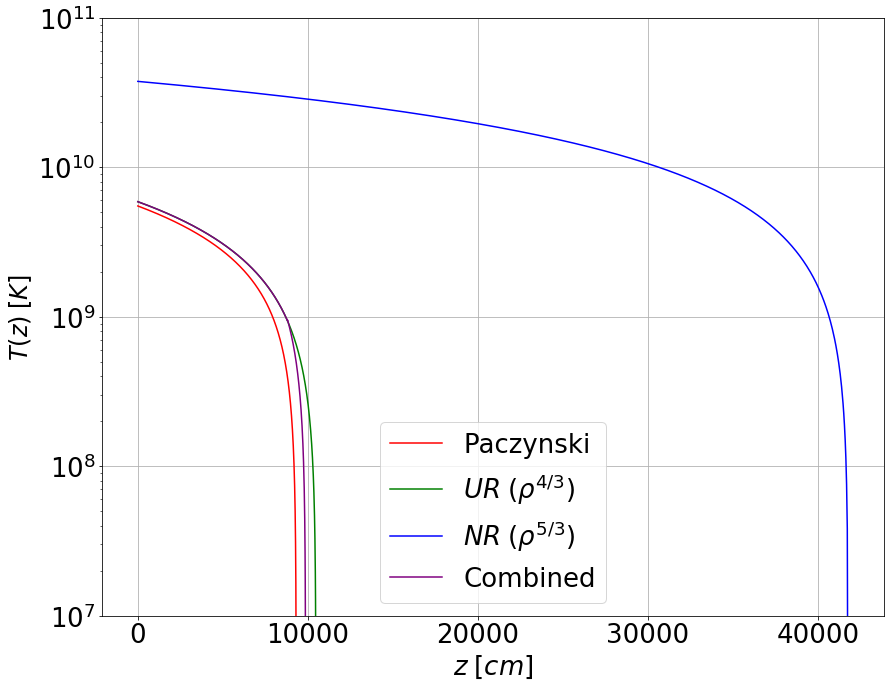

In [35]:
param['R'] =  8.314e7
def T(rho, pres, p=param):
    return pres / (p['R'] * rho)

T_pac = T(np.array(rho_pac), p_pac)
T_ur = T(rho_ur, p_ur)
T_nr = T(rho_nr, p_nr)
T_combined = T(rho_combined, p_combined)




fig = plt.figure(figsize=(14,11))
plt.plot(z_pac, T_pac, c='red', label='Paczynski')
plt.plot(z_ur, T_ur, c='green', label=r'$UR\;(\rho^{4/3})$')
plt.plot(z_nr, T_nr, c='blue', label=r'$NR\;(\rho^{5/3})$')
plt.plot(z_combined, T_combined, c='purple', label='Combined')
plt.yscale('log')
plt.legend(fontsize=26)
plt.grid()
plt.xlabel(r'$z\;[cm]$', fontsize=26)
plt.ylabel(r'$T(z)\;[K]$', fontsize=24)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.ylim(1e7, 1e11)
plt.show()

### Ignition curve
Given by equation 29 on Bildsten 1997: <br>

$$
T_{ign} \approx \frac{1.83\times 10^8\;K}{\kappa^{1/10}Y^{3/10} (\mu g_{14}y_8^2)^{1/5}}
$$

In [36]:
param['kappa'] = 0.136 #cm^2 / g. opacity, from page 9 after equation 20
param['Y'] = 0.3
param['mu'] = 0.6
param['M'] = 1.4 * (2e33) #mass sta4

def T_ign(y, p=param):
    print(type(y))
    g = param['G'] * param['M'] / param['R'] ** 2
    g_14 = g * 10 ** -14
    
    y_8 = y * 10 ** -8
    
    return 1.83e8 / (p['kappa'] ** (1/10) * p['Y'] ** (3/10) * (p['mu'] * g_14 * y_8 ** 2) ** (1/5)) 

param

{'c': 30000000000.0,
 'me': 9.109e-28,
 'mp': 1.672e-24,
 'h': 6.283185307179587e-27,
 'mu_e': 2,
 'G': 6.67e-08,
 'R': 83140000.0,
 'kappa': 0.136,
 'Y': 0.3,
 'mu': 0.6,
 'M': 2.7999999999999995e+33,
 'sigma_T': 6.6524e-25}

<class 'numpy.ndarray'>


/Users/cristozilleruelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


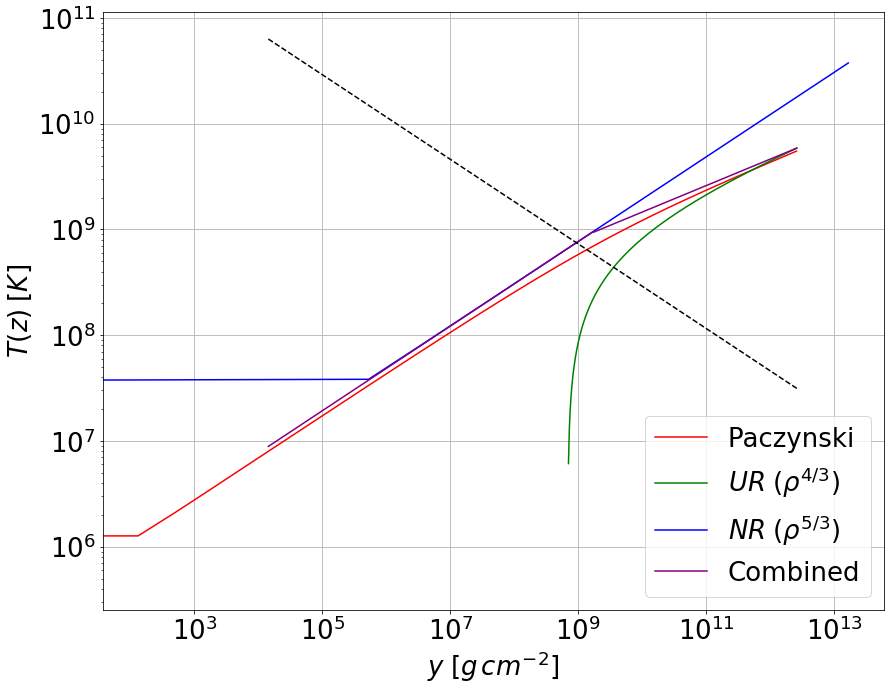

In [37]:
#we can get T vs y

def combined_p(z):
    if z > z_char:
        return NR(nr_rho(z))
    else:
        return UR(ur_rho(z))
    
#First we get T:

max_h_combined = 9864.57440646902
z_combined_y = np.linspace(0, max_h_combined, 1000)

#density = np.array([combined_rho(z) for z in z_combined_y])
#pressure = np.array([combined_p(z) for z in z_combined_y])
#T_combined = T(density, pressure)

#ignition region
T_ignition = T_ign(np.array(y_combined))

fig = plt.figure(figsize=(14,11))
plt.plot(y_pac, T_pac, c='red', label='Paczynski')
plt.plot(y_ur, T_ur, c='green', label=r'$UR\;(\rho^{4/3})$')
plt.plot(y_nr, T_nr, c='blue', label=r'$NR\;(\rho^{5/3})$')
plt.plot(y_combined, T_combined, c='purple', label='Combined')
plt.plot(y_combined, T_ignition, c='black', linestyle='--')
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=26)
plt.grid()
plt.xlabel(r'$y\;[g \,cm^{-2}]$', fontsize=26)
plt.ylabel(r'$T(z)\;[K]$', fontsize=26)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
#plt.xlim(1e7, 1e9)
#plt.ylim(1e8, 1e9)
plt.show()






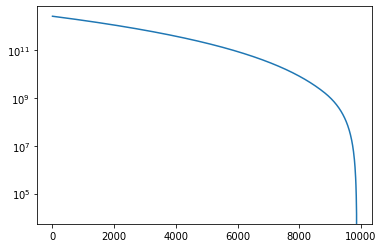

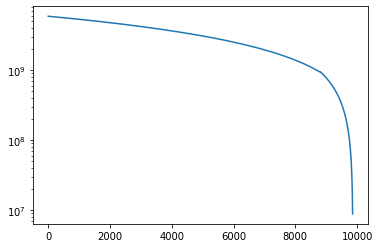

In [25]:
plt.plot(z_combined_y, y_combined)
plt.yscale('log')
plt.show()
plt.plot(z_combined, T_combined)
plt.yscale('log')
plt.show()

In [26]:
param

{'c': 30000000000.0,
 'me': 9.109e-28,
 'mp': 1.672e-24,
 'h': 6.283185307179587e-27,
 'mu_e': 2,
 'G': 6.67e-08,
 'R': 83140000.0,
 'kappa': 0.136,
 'Y': 0.3,
 'mu': 0.6,
 'M': 2.7999999999999995e+33}

### Eddington Rate estimation

In [27]:
param['sigma_T'] = 6.6524e-25 #cm^-2
param

{'c': 30000000000.0,
 'me': 9.109e-28,
 'mp': 1.672e-24,
 'h': 6.283185307179587e-27,
 'mu_e': 2,
 'G': 6.67e-08,
 'R': 83140000.0,
 'kappa': 0.136,
 'Y': 0.3,
 'mu': 0.6,
 'M': 2.7999999999999995e+33,
 'sigma_T': 6.6524e-25}

In [28]:
M_star = 1.4 * 2e33 #1.4 solar mass, cgs
# M_edd = 4*np.pi * param['G'] * param['mp'] * M_star / (param['sigma_T'] * param['c']) #g/s
# M_edd_solar_year = M_edd / 2e33 * (3600 * 24 * 365) #solar_mass / year
# print("Mdot edd: ", np.format_float_scientific(M_edd_solar_year), ' solar mass/year')
# print("Mdot = 0.2 Mdot Edd = ", np.format_float_scientific(0.2*M_edd_solar_year), ' solar mass/year')
# print(M_edd)
# print(1.3e38*1.4/(param['c']**2*0.1))
L_edd = 4*np.pi*param['c']*param['G']*M_star*param['mp'] / param['sigma_T']
print('L edd: ', L_edd)
print('M edd: ', L_edd / (param['c'] ** 2 * 0.1))
print('M edd [solar/year]: ', L_edd / (param['c'] ** 2 * 0.1) / 2e33 * (3600 * 24 * 365))
print('M dot [solar/year]: ', 0.2 * L_edd / (param['c'] ** 2 * 0.1) / 2e33 * (3600 * 24 * 365)) #20% of Edd

L edd:  1.7695910056075396e+38
M edd:  1.9662122284528218e+18
M edd [solar/year]:  3.1003234418244095e-08
M dot [solar/year]:  6.2006468836488184e-09


### Proplem 
We get the density profile $\rho(z)$ from $\rho(p)$ by numerically integrating:<br>

$$
\frac{dp}{\rho(p)} = g_z dz
$$

or

$$
\frac{dp}{d\rho}\frac{d\rho}{\rho} = g_z dz
$$
If we have $p(\rho)$. <br>



**Ignition conditions** (Bildsten 1997):<br>
<br>
$$
\epsilon_{3\alpha} = 5.3\times 10^{21}\frac{\rho_5^2 Y^3}{T^3_8} exp\Big(\frac{-44}{T_8}\Big) \;ergs\,g^{-1}\;s^{-1}
$$


$$
\epsilon_{cool} \equiv -\frac{acT^4}{3\kappa y^2}
$$

**Goal**: We want to get an equation of state expression $p(\rho)$ or $\rho(p)$ to obtain  $\rho(z)$ <br>


$$
\epsilon_{3\alpha}[T, \rho] = \epsilon_{cool}[T, y]
$$
From which **I need to get** $\rho(T)$. <br>
We know:

$$
\frac{dy}{dz} = -\rho
$$
$$
P = \rho R T\rightarrow \;T\,[\rho, P]
$$

I could assume non-degenerate (pg 6 Bildsten 1997):
$$P = \frac{\rho k_B T}{\mu m_p} = gy
$$

System of equations: 
<br>
$$
\epsilon_{3\alpha}\;[P,\rho]= \epsilon_{cool}\;[P, \rho, y]
$$

$$
\frac{dy}{dz} = -\rho
$$

$$
\frac{dp}{\rho(p)} = -g_z dz
$$

In [29]:
np.format_float_scientific(y[0])

NameError: name 'y' is not defined

In [ ]:
Paczynski(1e9)

Try: taylor expand

## thingy
$$
M(z) = \int_0^z\rho(r)r^2dr
$$

$$
\mu = \frac{M(z)}{M_{tot}}
$$
In principle it can be solved through the shooting method, boundary conoditions for rho at the bottom, for y at the top. 

In [ ]:
np.format_float_scientific(4037017.258596558)

In [ ]:
a = np.array([1, 2, 3, 4])
a[a <= 2]